<h1>Linear Regression From Scratch</h1>
<hr>
    
<strong>Question 2.1</strong> Derive the general closed form solution for multivariate regression model using ordinary least squares loss function given in Eqn. 2.1. Briefy explain each matrix involved in calculation and how they are constructed.

<strong>Answer: </strong>
<br>
<br>
Jn = || y - x𝛽 || 

   = ( y - x𝛽 )^T ( y - x𝛽 ) 

   = ( y^T - 𝛽^T . X^T )  ( y - x𝛽 )

   = ( y^T. y ) - ( 2 . 𝛽^T . X^T . y ) + ( 𝛽^T . X^T . X . 𝛽 )


ԁ(Jn) / d𝛽 = ( -2 . X^T . y ) + ( 2 . X^T . X . 𝛽 )
		
       ||
       || equating to zero
       ||
	   ||
	   \/
            
 ( -2 . X^T . y ) + ( 2 . X^T . X . 𝛽 ) = 0

	X^T . X . 𝛽 = X^T . y
		
	𝛽 = ( X^T . X ) ^-1 . X^T . y


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
cwd = os.getcwd()

# importing the data
pdTestFeatures  = pd.read_csv( os.path.join(cwd, "data", "test-features.csv"),  header=None)
pdTestLabels    = pd.read_csv( os.path.join(cwd, "data", "test-labels.csv"),    header=None)
pdTrainFeatures = pd.read_csv( os.path.join(cwd, "data", "train-features.csv"), header=None)
pdTrainLabels   = pd.read_csv( os.path.join(cwd, "data", "train-labels.csv"),   header=None)

npTestFeatures  = pdTestFeatures.values
npTestLabels    = pdTestLabels.values
npTrainFeatures = pdTrainFeatures.values
npTrainLabels   = pdTrainLabels.values

In [2]:
# stacking ones to the feature matrices in order to obtain correct results
npTrainFeatures = np.hstack((np.ones((14000)).reshape(-1, 1), npTrainFeatures))
npTestFeatures  = np.hstack((np.ones((3378 )).reshape(-1, 1), npTestFeatures ))

In [3]:
print( "Train Features : " + str(npTrainFeatures.shape) )
print( "Test  Features : " + str(npTrainLabels.shape  ) )
print( "Train Labels   : " + str(npTestFeatures.shape ) )
print( "Test  Labels   : " + str(npTestLabels.shape   ) )

Train Features : (14000, 9)
Test  Features : (14000, 1)
Train Labels   : (3378, 9)
Test  Labels   : (3378, 1)


<br>
<strong>Question 2.2</strong> Find the rank of XTX for the given dataset in question-2-train-features.csv using built-in library functions of your language (rank() for MATLAB, numpy.linalg.matrix rank() for numpy etc.). What does the rank tell you about the solution you have found for Question 2.1.

<strong>Answer: </strong> Rank of (X^T . X) is 9. This rank tells that we have 9 independent features in our dataset.  
<br>

In [4]:
# calculating the rank of the rank matrix
rankMatrix = (npTrainFeatures.T).dot(npTrainFeatures) 
rank = np.linalg.matrix_rank(rankMatrix)
print("RANK: " + str(rank))

RANK: 9


<br>
<strong>Question 2.3</strong> You are NOT allowed to use any machine learning libraries to train and test your model for this question. Train your model using the entries in question-2-train-features.csv and test your model on the entries in question-2-train-features.csv. Report your trained model's coefficients (beta values). Evaluate mean squared error on training and test set separately and report them.

<strong>Mean Squared Error on Training Dataset: </strong>18204.227976890255
<br>
<strong>Mean Squared Error on Test Dataset    : </strong>40379.06782240535
<br>
<br>
<strong>Weights</strong>
************************
35.52032936<br>
-0.47656134<br>
7.00054171<br>
1.37221717<br>
-4.24724733<br>
68.4775968<br>
286.19995694<br>
-180.5873212<br>
24.55935004<br>

<strong>Question 2.4: </strong>After training the model, comment on the coefficients you have found. What does it mean if a coefficient has negative sign? What is the relation between the magnitude of a coefficient and the predicted value? Plot the count of rental bikes vs. normalized humidity for the whole dataset (training set + test set) with normalized humidity on x axis and the count of rental bikes on y axis. Comment on the relation between the count of rental bikes and normalized humidity.

<strong>Answer: </strong>A coefficients value indicates the correlation between the feature and prediction. If we have a negative coefficient, that means that the result and the feature is negatively related and if we have a positive coefficient, that means that the result and the feature is positively related. As the coefficients value increases, the relation between the predicition and feature increases.
<br>

The relation between the count of rental bikes and normalized humidity is linearised in comparison with the real dataset. In addition, as it can be seen from the graph, normalised humidity and the count of rental bikes are inversely related with each other.<br>
<br>

In [5]:
# calculating weights
weights = np.linalg.inv((npTrainFeatures.T).dot(npTrainFeatures)).dot(npTrainFeatures.T).dot(npTrainLabels)
print("WEIGHTS")
print("---------------")
print(weights)

WEIGHTS
---------------
[[  35.52032936]
 [  -0.47656134]
 [   7.00054171]
 [   1.37221717]
 [  -4.24724733]
 [  68.4775968 ]
 [ 286.19995694]
 [-180.5873212 ]
 [  24.55935004]]


In [6]:
# calculating y head for training data.
npTrainLabelsHead = npTrainFeatures.dot( weights )
print(npTrainLabelsHead.shape)
print("-----------------------------")
print(npTrainLabelsHead)

(14000, 1)
-----------------------------
[[ -5.32769202]
 [  1.67284968]
 [ 23.42254873]
 ...
 [247.69965796]
 [276.30454984]
 [314.26723374]]


In [7]:
# calculating y head for test data.
npTestLabelsHead = npTestFeatures.dot( weights )
print(npTestLabelsHead.shape)
print("-----------------------------")
print(npTestLabelsHead)

(3378, 1)
-----------------------------
[[319.80158225]
 [327.53218992]
 [334.89866594]
 ...
 [161.14747555]
 [178.95880489]
 [169.70648769]]


In [8]:
# calculating mean square error for training data
meanSquaredErrorTraining = np.square( (npTrainLabels - npTrainLabelsHead) ).sum() / npTrainLabelsHead.shape[0]
print("Mean Squared Error on Training Dataset: " + str(meanSquaredErrorTraining))

Mean Squared Error on Training Dataset: 18204.227976890255


In [9]:
# calculating mean square error for test data
meanSquaredErrorTest = np.square( (npTestLabels - npTestLabelsHead) ).sum() / npTestLabelsHead.shape[0]
print("Mean Squared Error on Test Dataset: " + str(meanSquaredErrorTest))

Mean Squared Error on Test Dataset: 40379.06782240535


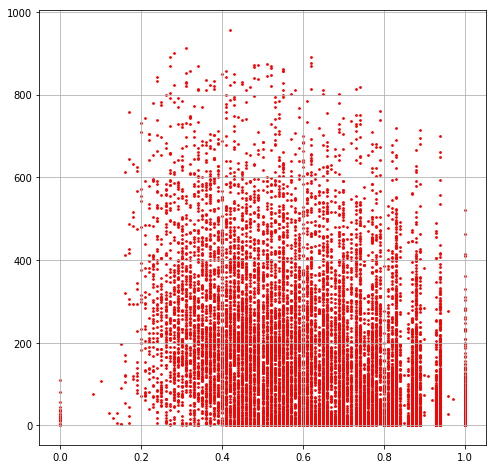

In [10]:
# drawing the graph for the count of rental bikes 
# vs. normalized humidity for the real training set
plt.figure(figsize=(8, 8))
plt.scatter(npTrainFeatures[:,7], npTrainLabels, color='red', s=3)
plt.grid()

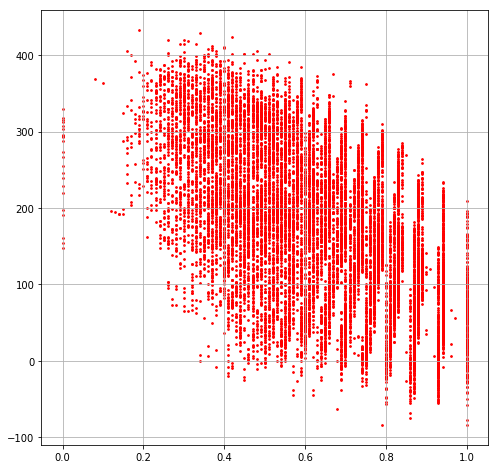

In [11]:
# drawing the graph for the count of rental bikes 
# vs. normalized humidity for the predicted training set
plt.figure(figsize=(8, 8))
plt.scatter(npTrainFeatures[:,7], npTrainLabelsHead, color='red', s=3)
plt.grid()

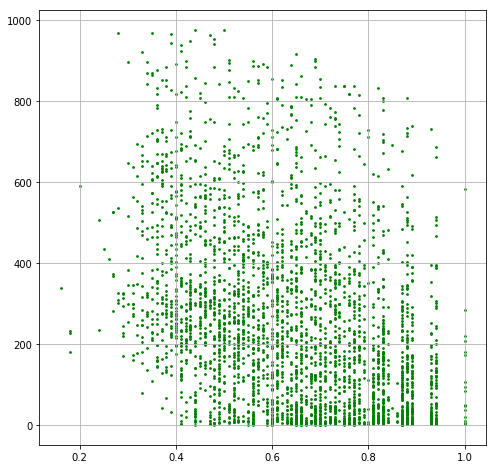

In [12]:
# drawing the graph for the count of rental bikes 
# vs. normalized humidity for the real test set
plt.figure(figsize=(8, 8))
plt.scatter(npTestFeatures[:,7], npTestLabels, color='green', s=3)
plt.grid()

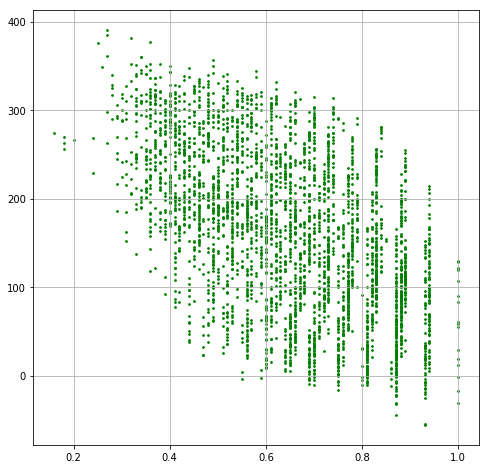

In [13]:
# drawing the graph for the count of rental bikes 
# vs. normalized humidity for the predicted test set
plt.figure(figsize=(8, 8))
plt.scatter(npTestFeatures[:,7], npTestLabelsHead, color='green', s=3)
plt.grid()

<strong>Question 2.5</strong> You are NOT allowed to use any machine learning libraries to train and test your model for this question. Train your model one more time using only normalized humidity as your feature and plot the count of rental bikes vs. normalized humidity for the whole dataset (training set + test set) with normalized humidity on x axis and the count of rental bikes on y axis. Comment on the relation between the count of rental bikes and normalized humidity and compare your results with the what you have found in Question 2.4.

<br>
<strong>Answer: </strong>As it can be seen from the graph below, normalised humidity and the count of rental bikes are inversely related with each other. Since we have less features included this time, less number of results ocurred.

In [14]:
# preparing the dataset for queston 2.5
npTrainFeatures2 = npTrainFeatures[:,7].reshape(-1, 1)
npTestFeatures2  = npTestFeatures[:,7].reshape(-1, 1)
npTrainLabels2   = npTrainLabels
npTestLabels2    = npTestLabels

In [15]:
# stacking ones to the feature matrices in order to obtain correct results
npTrainFeatures2 = np.hstack((np.ones((14000)).reshape(-1, 1), npTrainFeatures2))
npTestFeatures2  = np.hstack((np.ones((3378 )).reshape(-1, 1), npTestFeatures2 ))

In [16]:
print( "Train Features : " + str(npTrainFeatures2.shape) )
print( "Test  Features : " + str(npTrainLabels2.shape  ) )
print( "Train Labels   : " + str(npTestFeatures2.shape ) )
print( "Test  Labels   : " + str(npTestLabels2.shape   ) )

Train Features : (14000, 2)
Test  Features : (14000, 1)
Train Labels   : (3378, 2)
Test  Labels   : (3378, 1)


In [17]:
# calculating weights
weights2 = np.linalg.inv((npTrainFeatures2.T).dot(npTrainFeatures2)).dot(npTrainFeatures2.T).dot(npTrainLabels2)
print("WEIGHTS")
print("---------------")
print(weights2)

WEIGHTS
---------------
[[ 348.53430209]
 [-277.64064258]]


In [18]:
# calculating y head for training data.
npTrainLabelsHead2 = npTrainFeatures2.dot( weights2 )
print(npTrainLabelsHead2.shape)
print("----------------------")
print(npTrainLabelsHead2)

(14000, 1)
----------------------
[[126.42178803]
 [126.42178803]
 [140.30382016]
 ...
 [165.29147799]
 [187.5027294 ]
 [212.49038723]]


In [19]:
# calculating y head for test data.
npTestLabelsHead2 = npTestFeatures2.dot( weights2 )
print(npTestLabelsHead2.shape)
print("---------------------")
print(npTestLabelsHead2)

(3378, 1)
---------------------
[[212.49038723]
 [220.81960651]
 [220.81960651]
 ...
 [181.94991655]
 [193.05554225]
 [168.06788442]]


In [20]:
# calculating mean square error for training data
meanSquaredErrorTraining2 = np.square( (npTrainLabels2 - npTrainLabelsHead2) ).sum() / npTrainLabelsHead2.shape[0]
print("Mean Squared Error on Training Dataset: " + str(meanSquaredErrorTraining2))

Mean Squared Error on Training Dataset: 25134.00572225296


In [21]:
# calculating mean square error for test data
meanSquaredErrorTest2 = np.square( (npTestLabels2 - npTestLabelsHead2) ).sum() / npTestLabelsHead2.shape[0]
print("Mean Squared Error on Test Dataset: " + str(meanSquaredErrorTest2))

Mean Squared Error on Test Dataset: 48738.79264049626


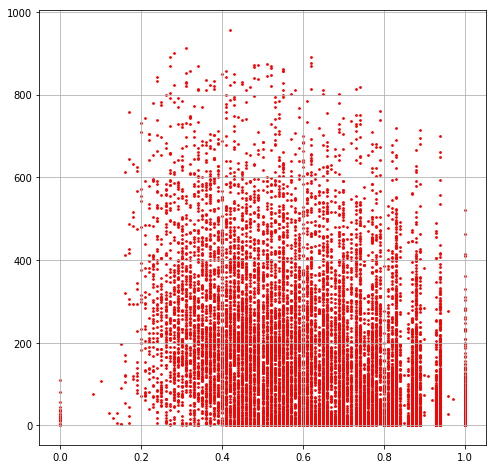

In [22]:
# drawing the graph for the count of rental bikes 
# vs. normalized humidity for the real training set
plt.figure(figsize=(8, 8))
plt.scatter(npTrainFeatures2[:,1], npTrainLabels2, color='red', s=3)
plt.grid()

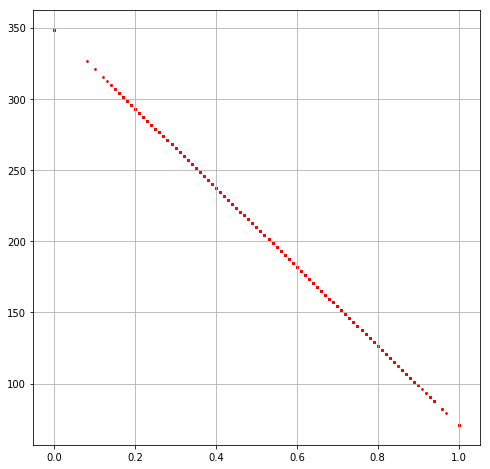

In [23]:
# drawing the graph for the count of rental bikes 
# vs. normalized humidity for the predicted training set
plt.figure(figsize=(8, 8))
plt.scatter(npTrainFeatures2[:,1], npTrainLabelsHead2, color='red', s=3)
plt.grid()

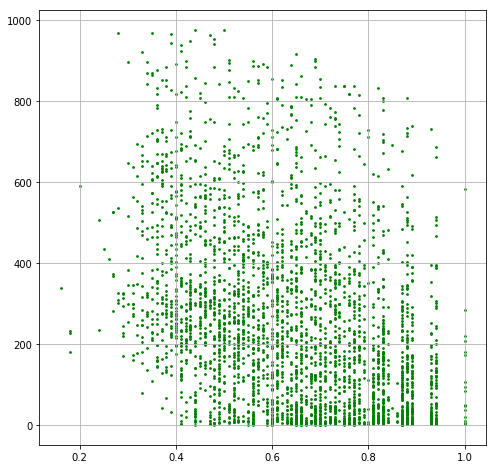

In [24]:
# drawing the graph for the count of rental bikes 
# vs. normalized humidity for the real test set
plt.figure(figsize=(8, 8))
plt.scatter(npTestFeatures2[:,1], npTestLabels2, color='green', s=3)
plt.grid()

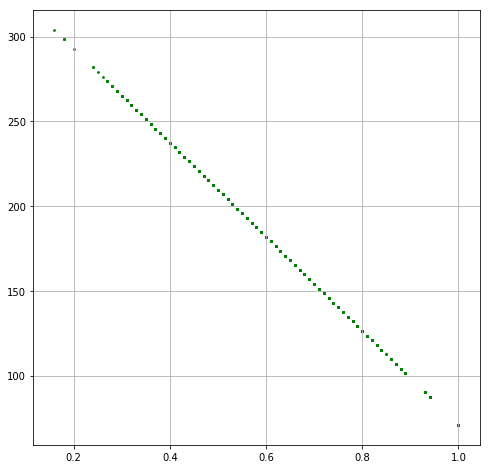

In [25]:
# drawing the graph for the count of rental bikes 
# vs. normalized humidity for the predicted test set
plt.figure(figsize=(8, 8))
plt.scatter(npTestFeatures2[:,1], npTestLabelsHead2, color='green', s=3)
plt.grid()